In [27]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

%matplotlib inline

Extracting train-images-idx3-ubyte.gz
Extracting train-labels-idx1-ubyte.gz
Extracting t10k-images-idx3-ubyte.gz
Extracting t10k-labels-idx1-ubyte.gz


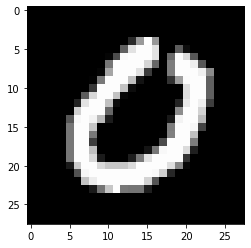

In [28]:
mnist = input_data.read_data_sets('', one_hot=True)

image = mnist.train.images[7].reshape([28, 28]);
plt.gray()
plt.imshow(image)

In [29]:
print(mnist.train.images[7][150:200])

[0.         0.         0.37254903 0.8862746  0.9921569  0.9921569
 0.8862746  0.         0.         0.36078432 0.0509804  0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01960784 0.29803923
 0.97647065 0.9921569  0.9921569  0.9921569  0.8862746  0.
 0.41176474 0.9843138  0.854902   0.34117648 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


In [30]:
print(mnist.train.labels[:10])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [31]:
###Neural network configuration
learning_rate = 0.1
epochs = 1000
batch_size = 128 ###Number of objects in one epoch

n_hidden_1 = 256
n_hidden_2 = 256
num_input = 784 
num_classes = 10

X = tf.compat.v1.placeholder('float', [None, num_input])
Y = tf.compat.v1.placeholder('float', [None, num_classes])

In [32]:
weights = {
    'h1': tf.Variable(tf.random.normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random.normal([n_hidden_1, n_hidden_2])),
    'output': tf.Variable(tf.random.normal([n_hidden_2, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random.normal([n_hidden_1])),
    'b2': tf.Variable(tf.random.normal([n_hidden_2])),
    'output': tf.Variable(tf.random.normal([num_classes]))
}

In [33]:
###Neural network
def network(x):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    output_layer = tf.matmul(layer_2, weights['output']) + biases['output']

    return output_layer

In [35]:
logits = network(X)

###Loss function (minimizing of cross entropy)
loss = tf.reduce_mean(
    input_tensor=tf.nn.softmax_cross_entropy_with_logits(
        logits=logits, labels=Y
    )
)

###Optimization algorithm
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss) ###Minimization of entropy with optimizer

correct_prediction = tf.equal(tf.argmax(input=logits, axis=1), tf.argmax(input=Y, axis=1))
accuracy = tf.reduce_mean(input_tensor=tf.cast(correct_prediction, tf.float32))

init = tf.compat.v1.global_variables_initializer()

In [36]:
###Learning
with tf.compat.v1.Session() as sess:
    sess.run(init)

    for epoch in range(epochs):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(train, feed_dict={X: batch_x, Y: batch_y})
        
        ###Every 50 epochs print debugging information
        if epoch % 50 == 0:
            train_accuracy = sess.run(
                accuracy, 
                feed_dict={
                    X: mnist.train.images,
                    Y: mnist.train.labels
                }
            )
            
            print('Epoch #{}: train accuracy = {}'.format(epoch, train_accuracy))

    print('Test accuracy = {}'.format(
        sess.run(
            accuracy,
            feed_dict={
                X: mnist.test.images,
                Y: mnist.test.labels
            }
        )
    ))

Epoch #0: train accuracy = 0.3113272786140442
Epoch #50: train accuracy = 0.8371454477310181
Epoch #100: train accuracy = 0.8498363494873047
Epoch #150: train accuracy = 0.8556181788444519
Epoch #200: train accuracy = 0.8472909331321716
Epoch #250: train accuracy = 0.8718545436859131
Epoch #300: train accuracy = 0.8643090724945068
Epoch #350: train accuracy = 0.8461272716522217
Epoch #400: train accuracy = 0.8583090901374817
Epoch #450: train accuracy = 0.8434545397758484
Epoch #500: train accuracy = 0.8489454388618469
Epoch #550: train accuracy = 0.8454181551933289
Epoch #600: train accuracy = 0.8521999716758728
Epoch #650: train accuracy = 0.8426727056503296
Epoch #700: train accuracy = 0.8380727171897888
Epoch #750: train accuracy = 0.8507999777793884
Epoch #800: train accuracy = 0.8303636312484741
Epoch #850: train accuracy = 0.8304363489151001
Epoch #900: train accuracy = 0.833690881729126
Epoch #950: train accuracy = 0.862709105014801
Test accuracy = 0.8535000085830688


In [37]:
###Neural network configuretion with Keras
batch_size = 128
num_classes = 10
epochs = 2

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [38]:
###Model creation
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(784,))) ###1 layer with 512 neurons
model.add(tf.keras.layers.Dropout(0.2)) ###Throw random neurons so that they are less correlated with each other
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [39]:
###Model compilation
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

_ = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2498 - acc: 0.9258 - val_loss: 0.1034 - val_acc: 0.9674
Epoch 2/2
60000/60000 [==============================] - 6s 108us/sample - loss: 0.1017 - acc: 0.9682 - val_loss: 0.0793 - val_acc: 0.9734


In [40]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.07930966514158062
Test accuracy: 0.9734
